<font size="+3" color=darkblue><b> <center><u> EDA & Prediction  on various factors that can cause heart attack  </u></center></b></font>

## 1. Features

`age` - Age of the patient

`sex` - Sex of the patient (1:MALE , 0: FEMALE)

`cp` - Chest pain type ~ 0 = Typical Angina, 1 = Atypical Angina, 2 = Non-anginal Pain, 3 = Asymptomatic

`trtbps` - Resting blood pressure (in mm Hg)

`chol` - Cholestoral in mg/dl fetched via BMI sensor

`fbs` - (fasting blood sugar > 120 mg/dl) ~ 1 = True, 0 = False

`restecg` - Resting electrocardiographic results ~ 0 = Normal, 1 = ST-T wave abnormality, 2 = Left ventricular hypertrophy

`thalachh`  - Maximum heart rate achieved

`oldpeak` - Previous peak

`slp` - Slope

`caa` - Number of major vessels 

`thall` - Thalium Stress Test result ~ (0,3)

`exng` - Exercise induced angina ~ 1 = Yes, 0 = No

`output\target` - 0 = Less chance of HEART ATTACK, 1 = More chance of HEART ATTACK

## 2. Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.figure_factory as ff
import plotly.express as px
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

## 3. Import Data

In [2]:
df=pd.read_csv("heart.csv")
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
print(f"Dimensions of the dataset: {df.shape} ")

Dimensions of the dataset: (303, 14) 


## 4. Check for missing values

In [4]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

**The data has no missing values**

## 5. Summary

In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trtbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalachh,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exng,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


<font color="brown" size=+2.5><b> PART 1 : Exploratory Data Analysis </b></font>

### 6.1 Univariate Analysis

Text(0.5, 0, 'age')

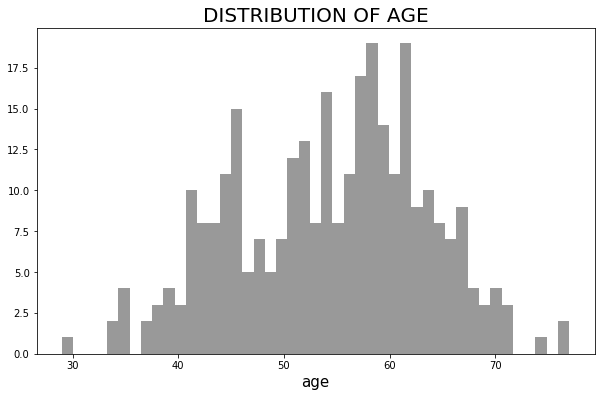

In [6]:
plt.figure(figsize=(10,6))
sns.distplot(df["age"],kde=False,bins=45,color='black')
plt.title("DISTRIBUTION OF AGE",fontsize=20)
plt.xlabel('age',fontsize=15)

Text(0.5, 1.0, 'Count patients for each Age')

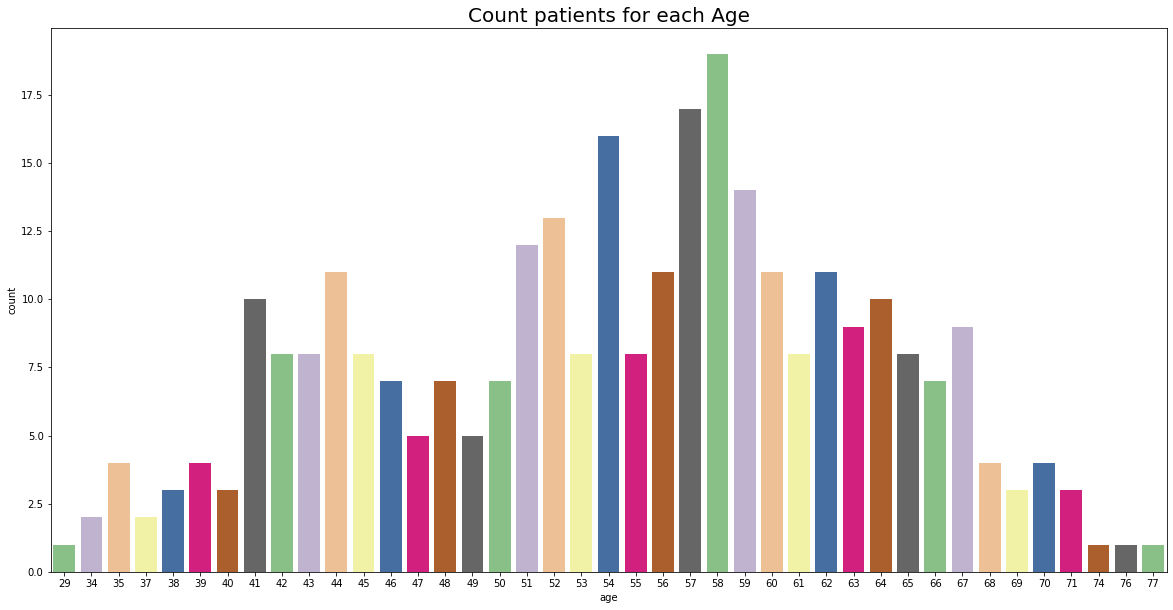

In [7]:
plt.figure(figsize=(20,10))
sns.countplot(x=df["age"],palette = 'Accent')
plt.title("Count patients for each Age",fontsize=20)

Text(0.5, 0, 'Sex [0:Female , 1: Male]')

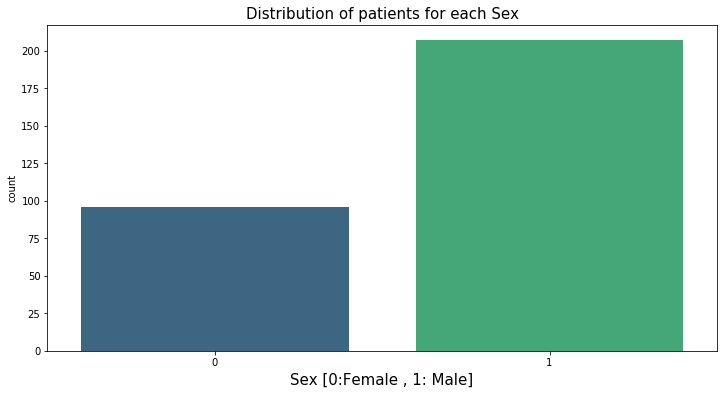

In [8]:
plt.figure(figsize=(12,6))
sns.countplot(x=df["sex"],palette='viridis')
plt.title("Distribution of patients for each Sex",fontsize=15)
plt.xlabel('Sex [0:Female , 1: Male]',fontsize=15)

Text(0.5, 1.0, 'Distribution of chest pain')

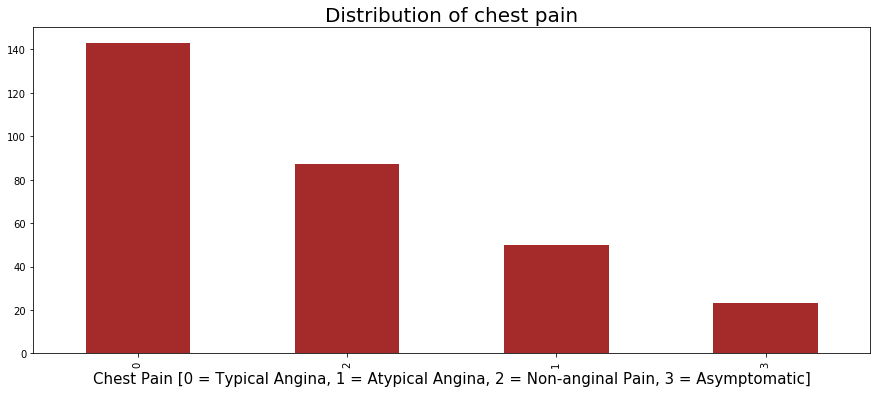

In [9]:
plt.figure(figsize=(15,6))
df["cp"].value_counts().plot(kind='bar',color='brown')
plt.xlabel('Chest Pain [0 = Typical Angina, 1 = Atypical Angina, 2 = Non-anginal Pain, 3 = Asymptomatic]',fontsize=15)
plt.title ('Distribution of chest pain',fontsize = 20)

Text(0.5, 1.0, 'Distribution of blood pressure')

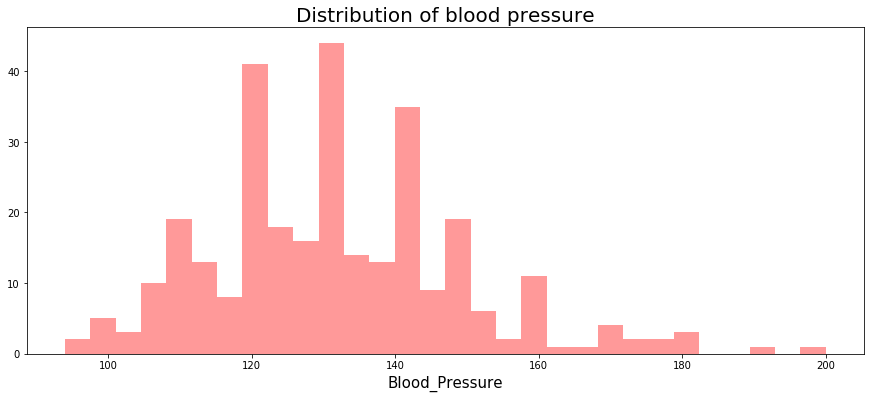

In [10]:
plt.figure(figsize=(15,6))
sns.distplot(df["trtbps"], color="red",kde=False,bins=30)
plt.xlabel('Blood_Pressure',fontsize=15)
plt.title('Distribution of blood pressure',fontsize = 20)

Text(0.5, 1.0, 'Distribution of Cholestrol')

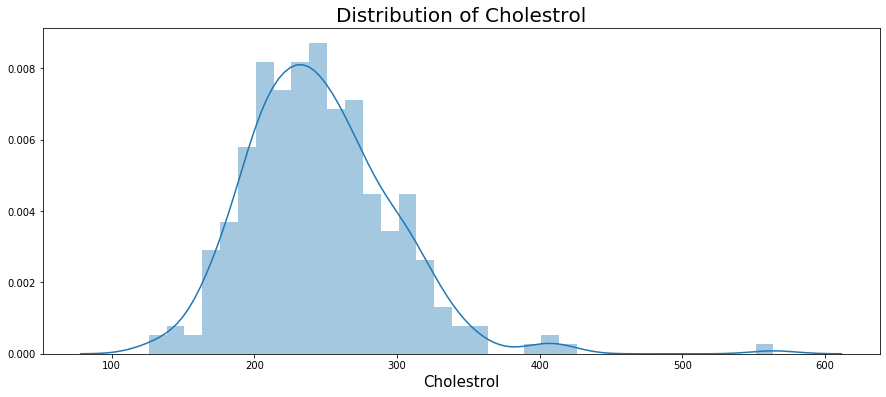

In [11]:
plt.figure(figsize=(15,6))
sns.distplot(df["chol"],kde=True,bins=35)
plt.xlabel('Cholestrol',fontsize = 15)
plt.title('Distribution of Cholestrol',fontsize = 20)

Text(0.5, 1.0, 'Distribution of Heart Rate')

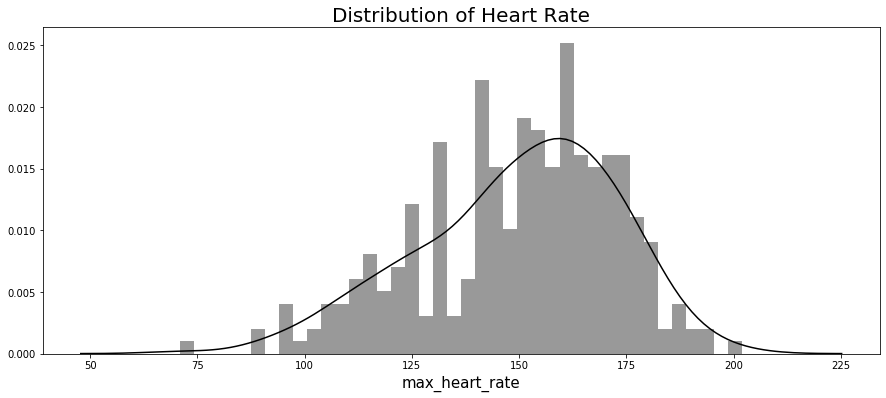

In [12]:
plt.figure(figsize=(15,6))
sns.distplot(df["thalachh"],kde=True,bins=40,color='black')
plt.xlabel('max_heart_rate',fontsize=15)
plt.title('Distribution of Heart Rate',fontsize = 20)

#### 6.2 Univariate Analysis Conclusions

`Most of the patients have age between 50 to 60`

`Around 200 are Male patients and 100 are Female patients`

`Most of the patients have type Value 1 Chest Pain`

`Most of the patients Blood Pressure lies between 120 to 140`

`Most of the patients Chlostrol level lies between 200 to 300`

`Most of the patients Heart Rate lies between 150 to 170`


### 6.3 Bi-Variate Analysis ( here we gonna cosider 'AGE' as one of the main factors )

Text(0.5, 0, 'Age')

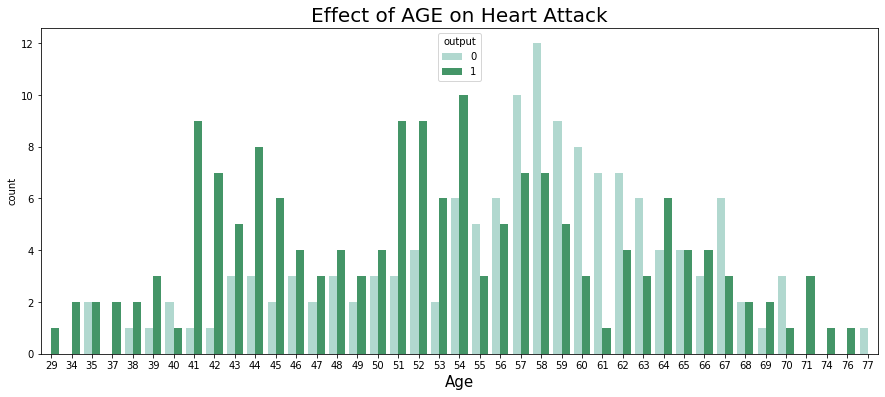

In [13]:
plt.figure(figsize=(15,6))
sns.countplot(data = df, x = 'age', hue = 'output',palette='BuGn')
plt.title("Effect of AGE on Heart Attack",fontsize=20)
plt.xlabel('Age',fontsize=15)

Text(0, 0.5, 'BP')

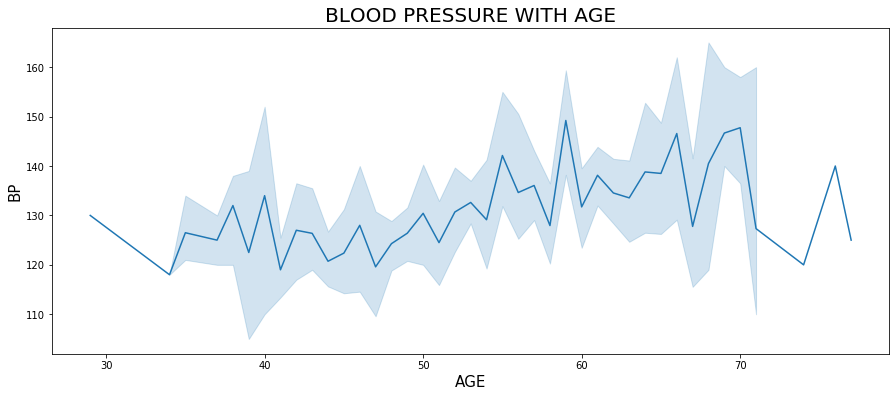

In [14]:
plt.figure(figsize=(15,6))
sns.lineplot(y="trtbps",x="age",data=df,palette='BuPu')
plt.title("BLOOD PRESSURE WITH AGE",fontsize=20)
plt.xlabel("AGE",fontsize=15)
plt.ylabel("BP",fontsize=15)

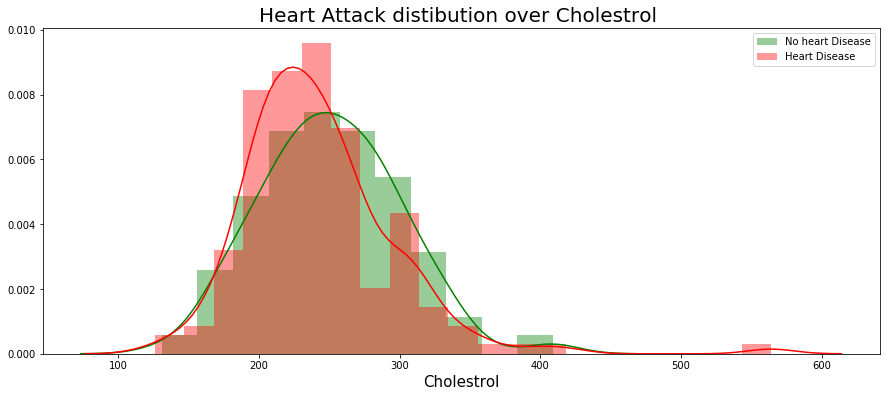

In [15]:
plt.figure(figsize=(15,6))
sns.distplot(df[df['output'] == 0]["chol"], color='green',label='No heart Disease') 
sns.distplot(df[df['output'] == 1]["chol"], color='red',label='Heart Disease')
plt.title('Heart Attack distibution over Cholestrol ', fontsize=20)
plt.xlabel('Cholestrol',fontsize=15)
plt.legend()

Text(0, 0.5, 'Heart_Rate')

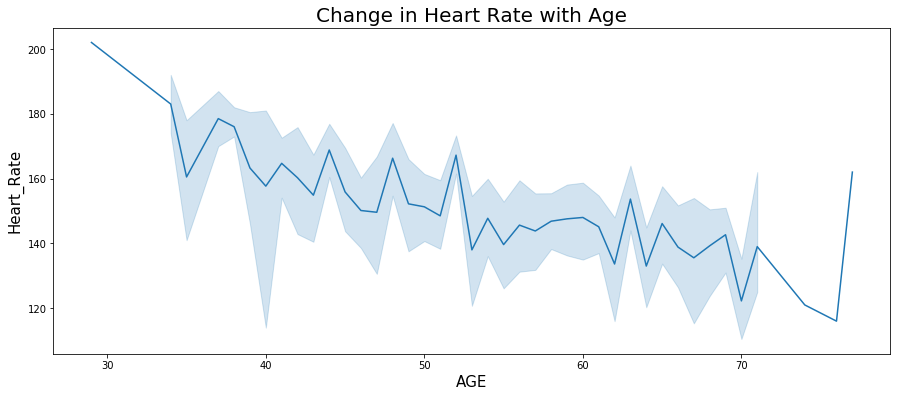

In [16]:
plt.figure(figsize=(15,6))
sns.lineplot(y="thalachh",x="age",data=df)
plt.title("Change in Heart Rate with Age",fontsize=20)
plt.xlabel("AGE",fontsize=15)
plt.ylabel("Heart_Rate",fontsize=15)

#### 6.4 Bi-variate Analysis Conclusions

`No strong Relationship with age and heart attack`

`Increase in Blood Pressure in the body  With  Increase in Age `

`High chance of Increase in Cholestrol Level in the body with increase in Age`

`High chance of Increase in Heart Rate in the body with increase in Age`


### 6.5 Multi-Variate Analysis

Text(0.5, 1.0, 'Chance of Heart Attack with increase in Age & Blood_Pressure')

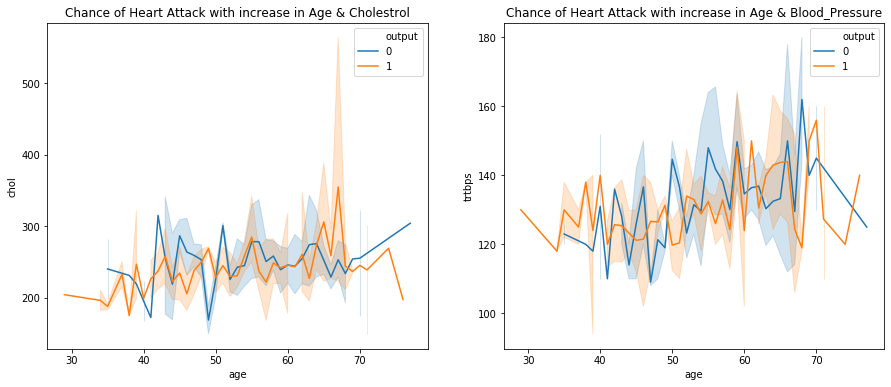

In [17]:
fig=plt.figure(figsize=(15, 6))
fig = plt.subplot(121)
sns.lineplot(x="age",y="chol",data=df,hue="output")
plt.title("Chance of Heart Attack with increase in Age & Cholestrol")

fig = plt.subplot(122)
sns.lineplot(x="age",y="trtbps",data=df,hue="output")
plt.title("Chance of Heart Attack with increase in Age & Blood_Pressure")

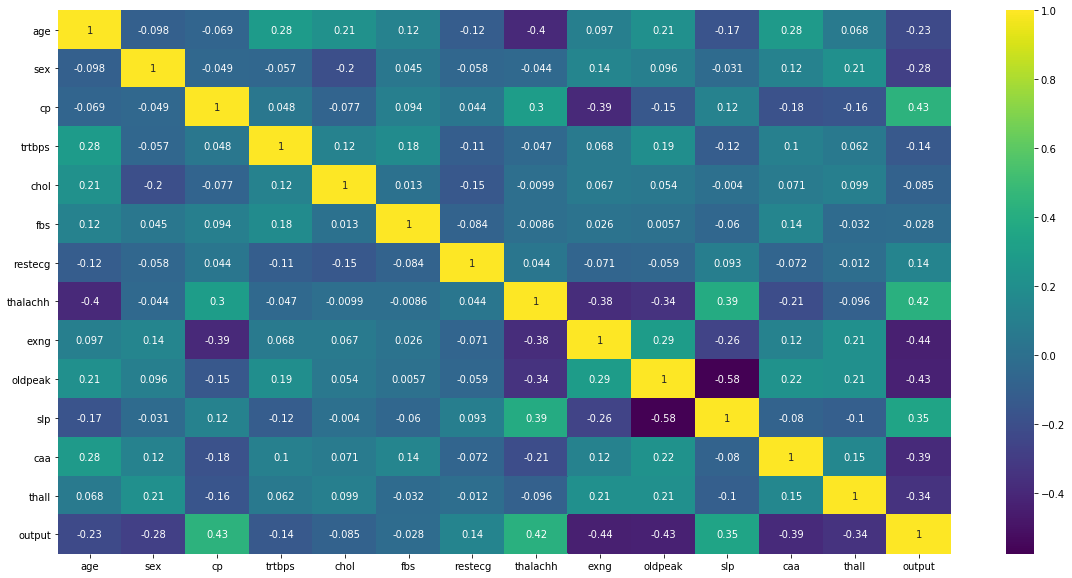

In [18]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True,cmap="viridis")

#### 6.6 Multi-variate Analysis Conclusions

`Increasing in the Cholestrol have high Risk of Heart Attack `

`Increasing in the Blood Pressure have high Risk of Heart Attack `

`Person with High Heart Rate Have High Risk of Heart Attack`

`Person with sex = 1 (male) have higher chance of heart attack.`

`People with no exercise induced angina have higher chance of heart attack.`



<font color="brown" size=+2.5><b> PART 2 : Heart Attack Prediction </b></font>

### 7. Scikit-Learn Imports

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report

### 8. train_test_split

In [20]:
X = df.drop('output',axis=1)
y  = df['output']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

### 9. Scaling

In [21]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_test  = scaler.transform(X_test)

## 10. Modeling

### 10.1 Logistic Regression

In [22]:
# instantiating
lg = LogisticRegression()

# fitting
lg.fit(X_train, y_train)

# prediction
predictions = lg.predict(X_test)

# validation
print(classification_report(y_test,predictions))
print('\n Confusion matrix')
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.87      0.73      0.79        37
           1       0.78      0.90      0.83        39

    accuracy                           0.82        76
   macro avg       0.82      0.81      0.81        76
weighted avg       0.82      0.82      0.81        76


 Confusion matrix
[[27 10]
 [ 4 35]]


### 10.2 Support Vector Machines

In [23]:
# instantiating
svm = SVC()

# fitting
svm.fit(X_train,y_train)

# predictions
predictions = svm.predict(X_test)

# validation

print(classification_report(y_test,predictions))
print('\n confusion matrix')
print(confusion_matrix(y_test,predictions))


              precision    recall  f1-score   support

           0       0.90      0.76      0.82        37
           1       0.80      0.92      0.86        39

    accuracy                           0.84        76
   macro avg       0.85      0.84      0.84        76
weighted avg       0.85      0.84      0.84        76


 confusion matrix
[[28  9]
 [ 3 36]]


### 10.3 SVM with Gridsearch

In [24]:
# instantiating SVM
svm = SVC()

# setting a grid
param_grid = {'C':[0.1,1,10,100,100],'gamma':[1,0.1,0.01,0.001,0.0001],'kernel':['rbf']}

#instantiating the GridSearchCV
grid = GridSearchCV(svm,param_grid,verbose=3)

#fitting
grid.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.543, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.565, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.556, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.556, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.556, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.739, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s



[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV] ........ C=1, gamma=0.001, kernel=rbf, score=0.667, total=   0.0s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV] ........ C=1, gamma=0.001, kernel=rbf, score=0.689, total=   0.0s
[CV] C=1, gamma=0.0001, kernel=rbf ...................................
[CV] ....... C=1, gamma=0.0001, kernel=rbf, score=0.543, total=   0.0s
[CV] C=1, gamma=0.0001, kernel=rbf ...................................
[CV] ....... C=1, gamma=0.0001, kernel=rbf, score=0.565, total=   0.0s
[CV] C=1, gamma=0.0001, kernel=rbf ...................................
[CV] ....... C=1, gamma=0.0001, kernel=rbf, score=0.556, total=   0.0s
[CV] C=1, gamma=0.0001, kernel=rbf ...................................
[CV] ....... C=1, gamma=0.0001, kernel=rbf, score=0.556, total=   0.0s
[CV] C=1, gamma=0.0001, kernel=rbf ...................................
[CV] ....... C=1, gamma=0.0001, kernel=rbf, score=0.556, total=   0.0s
[CV] 

[CV] ....... C=100, gamma=0.01, kernel=rbf, score=0.804, total=   0.0s
[CV] C=100, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=100, gamma=0.01, kernel=rbf, score=0.822, total=   0.0s
[CV] C=100, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=100, gamma=0.01, kernel=rbf, score=0.756, total=   0.0s
[CV] C=100, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=100, gamma=0.01, kernel=rbf, score=0.822, total=   0.0s
[CV] C=100, gamma=0.001, kernel=rbf ..................................
[CV] ...... C=100, gamma=0.001, kernel=rbf, score=0.870, total=   0.0s
[CV] C=100, gamma=0.001, kernel=rbf ..................................
[CV] ...... C=100, gamma=0.001, kernel=rbf, score=0.761, total=   0.0s
[CV] C=100, gamma=0.001, kernel=rbf ..................................
[CV] ...... C=100, gamma=0.001, kernel=rbf, score=0.867, total=   0.0s
[CV] C=100, gamma=0.001, kernel=rbf ..................................
[CV] .

[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:    0.5s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 100],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

#### 10.3.1 Best Parameters

In [25]:
grid.best_params_

{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}

#### 10.3.2 Prediciton and Evaluation 

In [26]:
predictions = grid.predict(X_test)

print(classification_report(y_test,predictions))
print('\n confusion matrix')
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.93      0.76      0.84        37
           1       0.80      0.95      0.87        39

    accuracy                           0.86        76
   macro avg       0.87      0.85      0.85        76
weighted avg       0.87      0.86      0.85        76


 confusion matrix
[[28  9]
 [ 2 37]]


### 10.4 Decision Tree

In [27]:
# instantiating 
dtree = DecisionTreeClassifier()

# fitting
dtree.fit(X_train,y_train)

# predictions
pred = dtree.predict(X_test)

# validation
print(classification_report(y_test,pred))
print('\n confusion matrix')
print(confusion_matrix(y_test,pred))

              precision    recall  f1-score   support

           0       0.80      0.76      0.78        37
           1       0.78      0.82      0.80        39

    accuracy                           0.79        76
   macro avg       0.79      0.79      0.79        76
weighted avg       0.79      0.79      0.79        76


 confusion matrix
[[28  9]
 [ 7 32]]


### 10.5 Random Forest

In [28]:
# instantiating 
rfc = RandomForestClassifier(n_estimators=100)

# fitting the model
rfc.fit(X_train, y_train)

# predictions
pred = rfc.predict(X_test)

# validation
print(classification_report(y_test,pred))
print('\n confusion matrix')
print(confusion_matrix(y_test,pred))


              precision    recall  f1-score   support

           0       0.91      0.78      0.84        37
           1       0.82      0.92      0.87        39

    accuracy                           0.86        76
   macro avg       0.86      0.85      0.85        76
weighted avg       0.86      0.86      0.85        76


 confusion matrix
[[29  8]
 [ 3 36]]


### 11 Conclusion from Modeling

**Both 'SVM with GridSearch' and 'Random Forest' models have good accuracy (87%)**